<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Extensions_of_the_Linear_Model_in_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     590.0
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:42:03   Log-Likelihood:                -10610.
No. Observations:                1070   AIC:                         2.124e+04
Df Residuals:                    1060   BIC:                         2.129e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

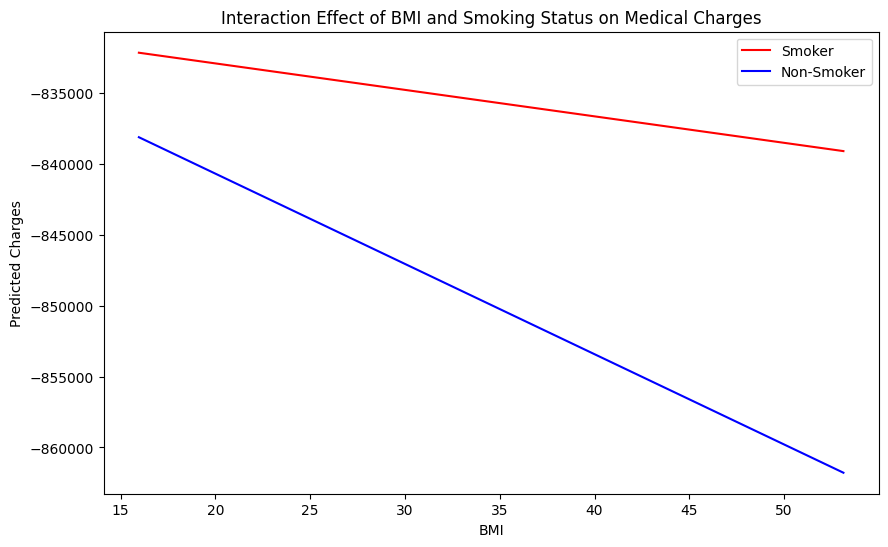

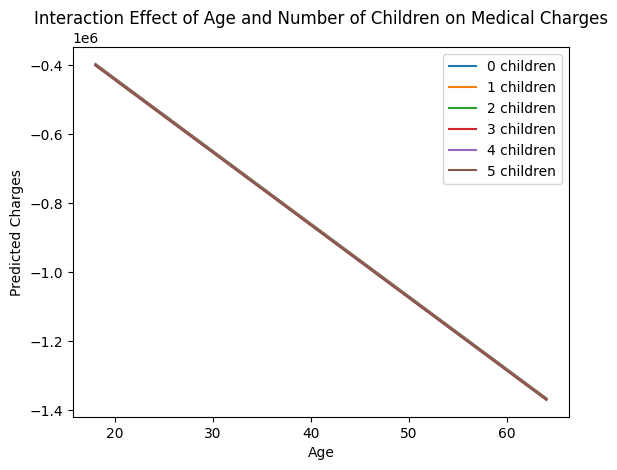

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# I need to start by loading the dataset to explore the relationship between variables and medical charges
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

# I should encode categorical variables because I can't use them in regression without converting them to numerical form
data = pd.get_dummies(data, drop_first=True)

# I want to define a regression formula that includes interaction terms to account for variable dependencies
formula = 'charges ~ age + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest + bmi:smoker_yes + age:children'

# I need to create design matrices to structure the data in a way the regression model can understand
y, X = dmatrices(formula, data, return_type='dataframe')

# Splitting the data into training and testing sets is crucial for me to validate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I want to fit the linear regression model to the training data to understand how these variables interact
model = sm.OLS(y_train, X_train).fit()

# I need to check the summary of the model to interpret the coefficients, p-values, and overall significance
print(model.summary())

# By predicting on the test set, I can assess how well the model generalizes to unseen data
y_pred = model.predict(X_test)

# I use Mean Squared Error and R-squared metrics to evaluate the model's accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# I want to visualize the interaction effect between BMI and smoking status to understand how these variables influence charges
# First, I create a range of BMI values to use in the predictions
bmi_range = np.linspace(data['bmi'].min(), data['bmi'].max(), 100)

# I predict charges for smokers across the BMI range to see the effect of smoking status
charges_smoker = model.predict(pd.DataFrame({
    'Intercept': 1,
    'age': data['age'].mean(),
    'bmi': bmi_range,
    'children': data['children'].mean(),
    'smoker_yes': 1,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0,
    'bmi:smoker_yes': bmi_range,
    'age:children': data['age'].mean() * data['children'].mean()
}))

# I also predict charges for non-smokers to compare how smoking status alters the effect of BMI
charges_non_smoker = model.predict(pd.DataFrame({
    'Intercept': 1,
    'age': data['age'].mean(),
    'bmi': bmi_range,
    'children': data['children'].mean(),
    'smoker_yes': 0,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0,
    'bmi:smoker_yes': 0,
    'age:children': data['age'].mean() * data['children'].mean()
}))

# I want to plot these predictions to clearly see how the interaction between BMI and smoking status affects charges
plt.figure(figsize=(10, 6))
plt.plot(bmi_range, charges_smoker, label='Smoker', color='red')
plt.plot(bmi_range, charges_non_smoker, label='Non-Smoker', color='blue')
plt.xlabel('BMI')
plt.ylabel('Predicted Charges')
plt.title('Interaction Effect of BMI and Smoking Status on Medical Charges')
plt.legend()
plt.show()

# I also want to visualize how age and the number of children interact to influence charges
age_range = np.linspace(data['age'].min(), data['age'].max(), 100)

# I loop through the number of children to predict charges across the age range
for children in range(data['children'].max() + 1):
    charges = model.predict(pd.DataFrame({
        'Intercept': 1,
        'age': age_range,
        'bmi': data['bmi'].mean(),
        'children': children,
        'smoker_yes': data['smoker_yes'].mean(),
        'region_northwest': 0,
        'region_southeast': 0,
        'region_southwest': 0,
        'bmi:smoker_yes': data['bmi'].mean() * data['smoker_yes'].mean(),
        'age:children': age_range * children
    }))
    # I plot each line separately to see the effect for different numbers of children
    plt.plot(age_range, charges, label=f'{children} children')

# I add labels and titles to make the plot understandable
plt.xlabel('Age')
plt.ylabel('Predicted Charges')
plt.title('Interaction Effect of Age and Number of Children on Medical Charges')
plt.legend()
plt.show()
